## Homework 10

1. Explain how does the k-means algorithm work?
2. Base on the given data set (https://raw.githubusercontent.com/franklin-univ-data-science/data/master/customers.csv), apply k-mean clustering, identify the number of clusters using the elbow method, present the results by scatter plot. (Hint: ID is not a feature)
3. Apply silhouette analysis on the above k-mean clustering.
4. In two to three paragraphs of prose (i.e. sentences, not bullet lists), summarize and interact with the content that was covered this week in readings and in class meeting. In your summary, you should highlight the major topics, methods, and practices that were covered. Your summary should also interact with the material through personal observations, reflections, and applications to the field of study. In particular, highlight what surprised, enlightened, or otherwise engaged you. In other words, you should think and write critically not just about what was presented but also what you have learned through the session.

The k-means algorithm is a clustering algorithm that will cluster using a prototype that can be centroid or medoid when sorted by categorical features. This is done by picking k centroids from the sample to make them the centers of the clusters. Then the data is assigned to the nearest cluster. The centroid is then moved into the middle of the cluster and this is repeated until no points are moving.

C:\Users\leona\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


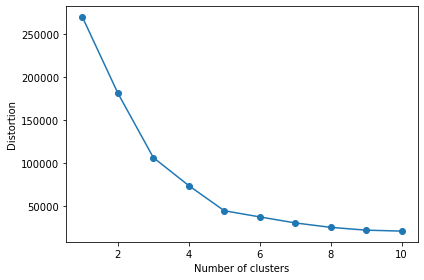

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/customers.csv')
X = data.iloc[:, [1, 2]].values
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300,tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

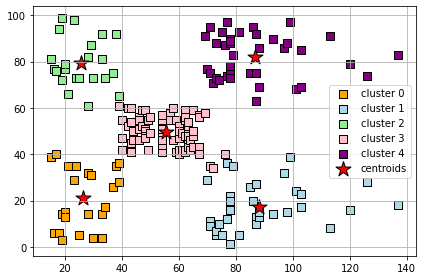

In [2]:
km = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)
colors = ['orange', 'lightblue', 'lightgreen', 'pink', 'purple', 'yellow']

for i in range(km.n_clusters):
  plt.scatter(X[y_km == i, 0],
              X[y_km == i, 1],
              s=50, c=colors[i],
              marker='s', edgecolor='black',
              label=f'cluster {i}')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*',
            c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

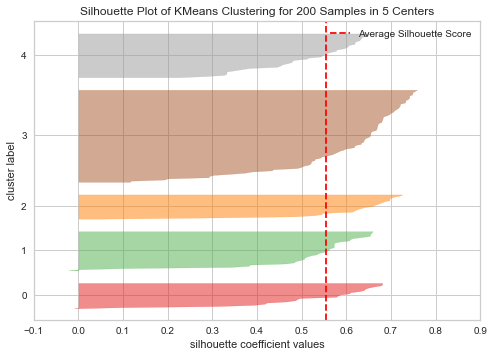

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [3]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(km)

visualizer.fit(X) 
visualizer.poof() 

This week we looked at how to cluster data that is unlabeled. We use k-mean to set up clustering that will be used to help sort the data. To be able to cluster, we need to find the centroid which will be the center or medoid that will be the most frequent. These are used as the centers to the cluster and will be moved to the middle of the lcuster after each iteration until there are no more moving points of data. To determine the number of clusters, we can use the elbow method where that point which the graph looks jaged and not as smooth as the rest will be the number of clusters. The silhouette plots are used to show the quality of the clustering to make sure that it is not far off. DBSCAN is used to label the clusters based on the density of the regions of points.